<a href="https://colab.research.google.com/github/Mrmazenn1/ML-intern-at-Elevvo-/blob/main/student_exam_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv('StudentPerformanceFactors.csv')

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df=df.drop_duplicates()

In [ ]:
df.dropna(subset=['Hours_Studied','Exam_Score'])

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


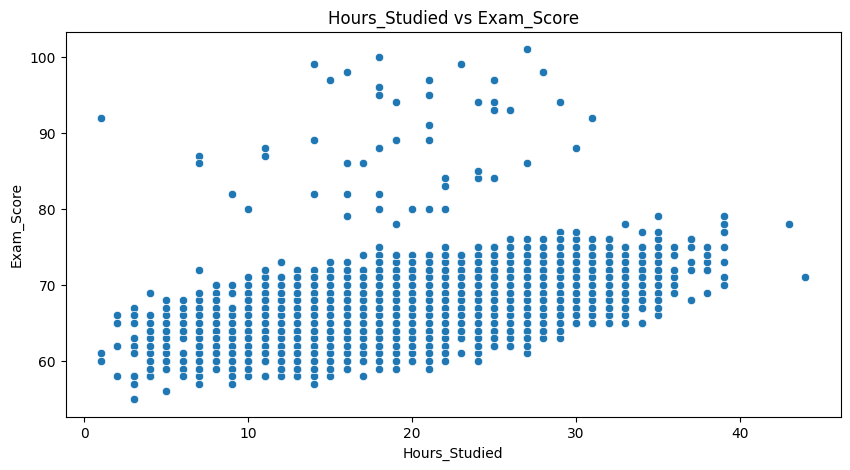

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df , x='Hours_Studied' , y='Exam_Score')
plt.title('Hours_Studied vs Exam_Score')
plt.show()

In [ ]:
print("Correlation:",df[['Hours_Studied','Exam_Score']].corr())

Correlation:                Hours_Studied  Exam_Score
Hours_Studied       1.000000    0.445455
Exam_Score          0.445455    1.000000


In [ ]:
x=df[['Hours_Studied']]
y=df['Exam_Score']
x_traiin,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
model=LinearRegression()
model.fit(x_traiin,y_train)
print ("slope(coefficient):",model.coef_[0])
print ("intercept:",model.intercept_)

slope(coefficient): 0.285668744443087
intercept: 61.51116746904424


In [ ]:
y_pred=model.predict(x_test)

Text(0.5, 1.0, 'Hours_Studied vs Exam_Score')

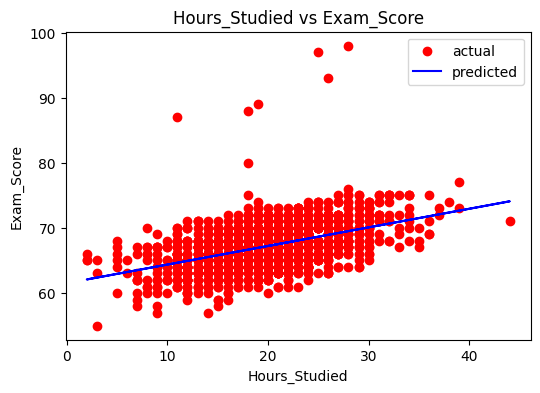

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(x_test,y_test,color='red',label='actual')
plt.plot(x_test,y_pred,color='blue', label='predicted')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.legend()
plt.title('Hours_Studied vs Exam_Score')

In [ ]:
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 10.85592128879332


In [ ]:
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

R-squared: 0.2319868674542106


In [ ]:
target = 'Exam_Score'

In [ ]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.drop(target)
categorical_features = df.select_dtypes(include=['object']).columns

Correlation between Hours_Studied and Exam_Score: 0.44545495407528174


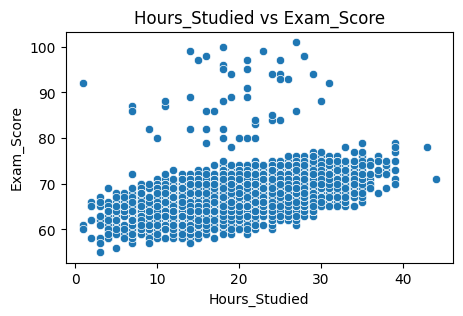

Correlation between Attendance and Exam_Score: 0.5810718633120632


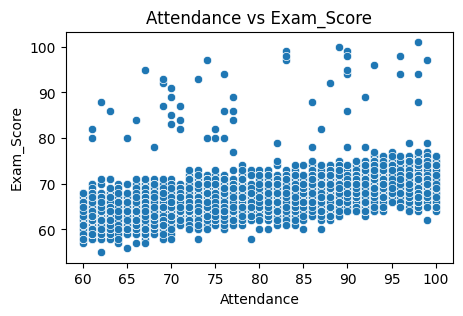

Correlation between Sleep_Hours and Exam_Score: -0.017021628571502398


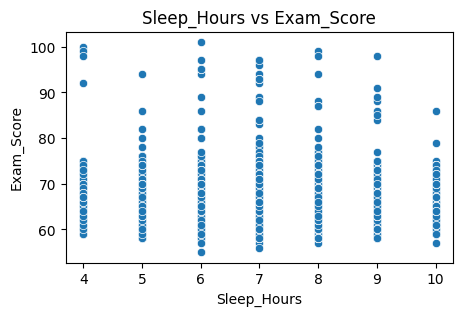

Correlation between Previous_Scores and Exam_Score: 0.17507908702291072


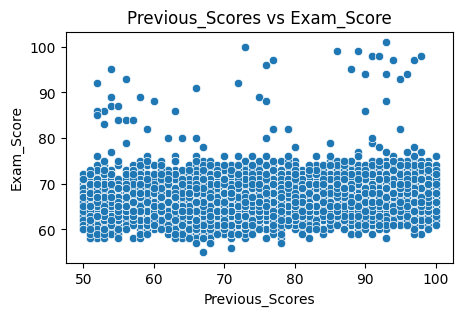

Correlation between Tutoring_Sessions and Exam_Score: 0.1565251853922526


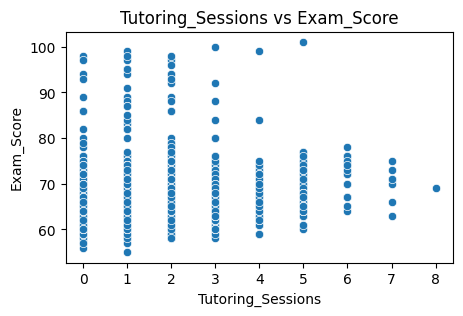

Correlation between Physical_Activity and Exam_Score: 0.027824436180257393


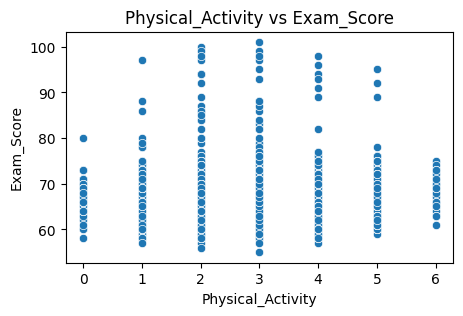

In [ ]:
for col in numeric_features:
    corr=df[[col,target]].corr().iloc[0,1]
    print(f"Correlation between {col} and {target}: {corr}")
    plt.figure(figsize=(5,3))
    sns.scatterplot(data=df,x=col,y=target)
    plt.title(f"{col} vs {target}")
    plt.show()

Mean scores for Parental_Involvement:
Parental_Involvement
Low       66.358265
Medium    67.098156
High      68.092767
Name: Exam_Score, dtype: float64



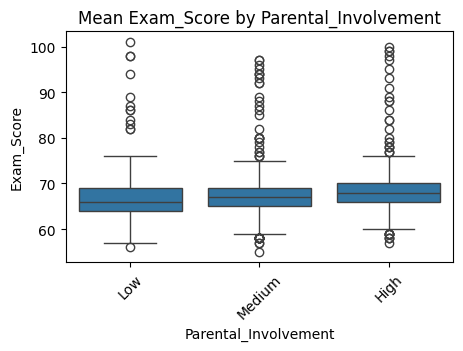

Mean scores for Access_to_Resources:
Access_to_Resources
Low       66.203351
Medium    67.134378
High      68.092152
Name: Exam_Score, dtype: float64



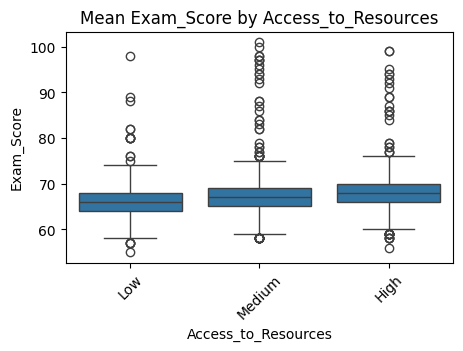

Mean scores for Extracurricular_Activities:
Extracurricular_Activities
No     66.931435
Yes    67.441849
Name: Exam_Score, dtype: float64



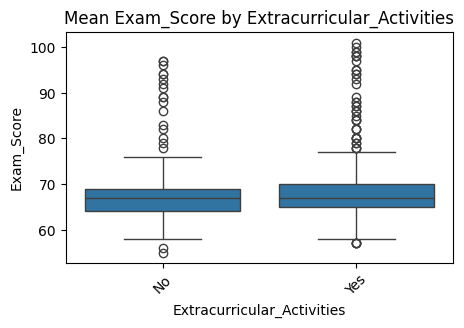

Mean scores for Motivation_Level:
Motivation_Level
Low       66.752194
Medium    67.330648
High      67.704321
Name: Exam_Score, dtype: float64



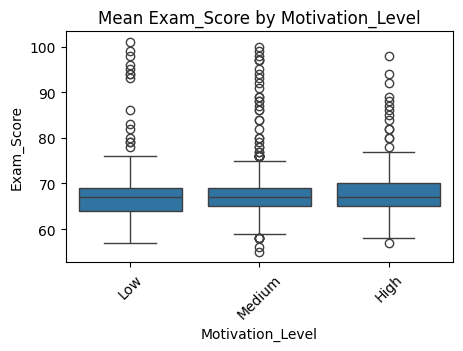

Mean scores for Internet_Access:
Internet_Access
No     66.535070
Yes    67.292895
Name: Exam_Score, dtype: float64



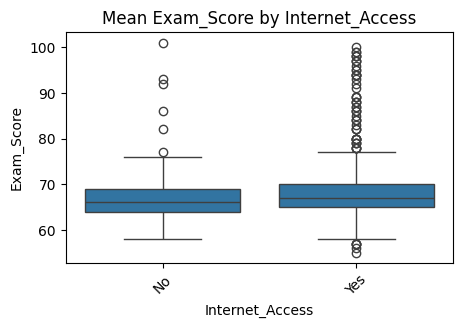

Mean scores for Family_Income:
Family_Income
Low       66.848428
Medium    67.334959
High      67.842396
Name: Exam_Score, dtype: float64



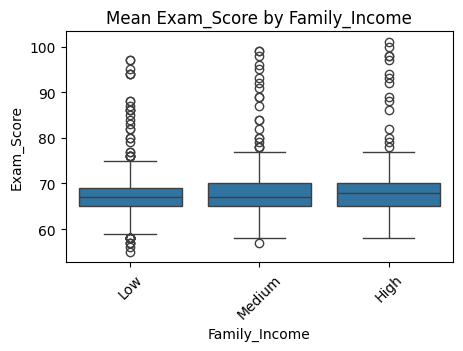

Mean scores for Teacher_Quality:
Teacher_Quality
Low       66.753425
Medium    67.109299
High      67.676939
Name: Exam_Score, dtype: float64



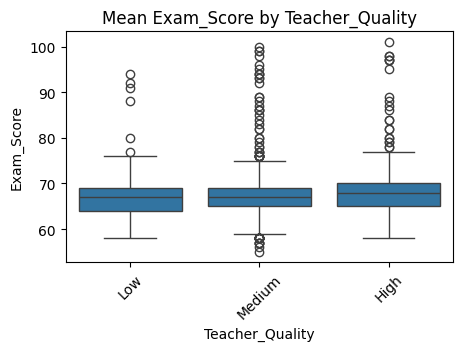

Mean scores for School_Type:
School_Type
Public     67.212919
Private    67.287705
Name: Exam_Score, dtype: float64



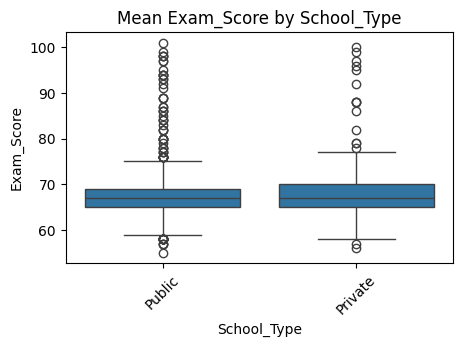

Mean scores for Peer_Influence:
Peer_Influence
Negative    66.564270
Neutral     67.197917
Positive    67.623199
Name: Exam_Score, dtype: float64



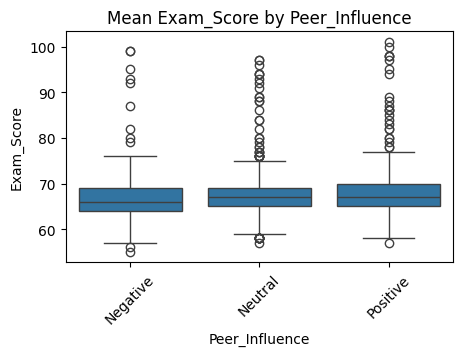

Mean scores for Learning_Disabilities:
Learning_Disabilities
Yes    66.270504
No     67.349120
Name: Exam_Score, dtype: float64



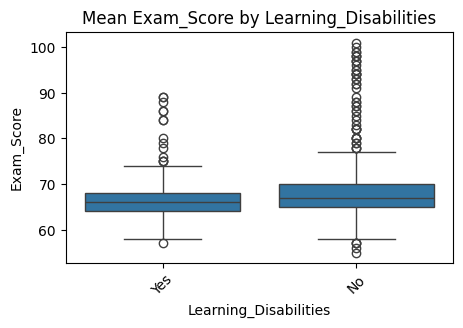

Mean scores for Parental_Education_Level:
Parental_Education_Level
High School     66.893577
College         67.315737
Postgraduate    67.970881
Name: Exam_Score, dtype: float64



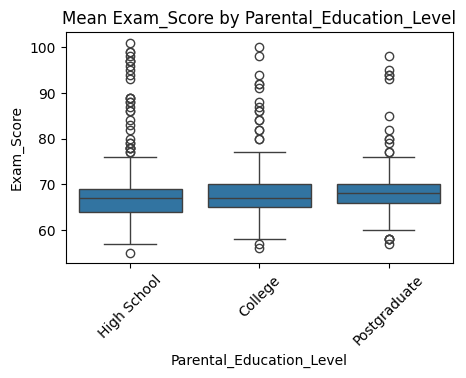

Mean scores for Distance_from_Home:
Distance_from_Home
Far         66.457447
Moderate    66.981481
Near        67.512101
Name: Exam_Score, dtype: float64



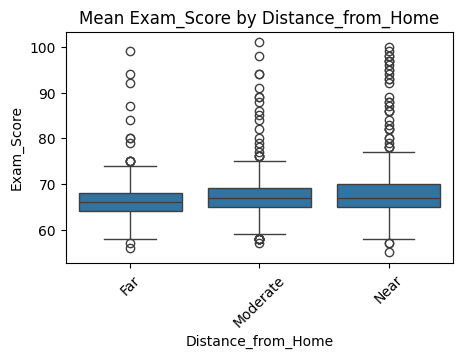

Mean scores for Gender:
Gender
Male      67.228894
Female    67.244898
Name: Exam_Score, dtype: float64



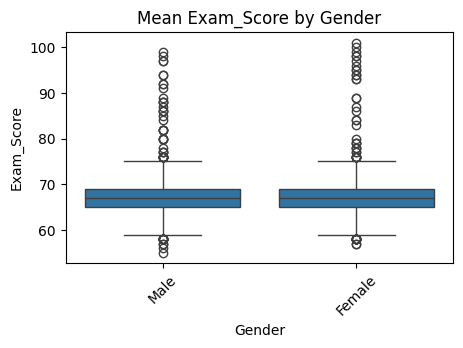

In [ ]:
for col in categorical_features:
  mean_scores = df.groupby(col)[target].mean().sort_values()
  print(f"Mean scores for {col}:\n{mean_scores}\n")
  plt.figure(figsize=(5,3))
  sns.boxplot(data = df , x = col , y= target,order=mean_scores.index)
  plt.title(f"Mean {target} by {col}")
  plt.xticks(rotation=45)
  plt.show()

In [ ]:
x=df[['Hours_Studied', 'Motivation_Level', 'Attendance']]
y= df['Exam_Score']

In [ ]:
categorical_features = ['Motivation_Level']
numeric_features = ['Hours_Studied', 'Attendance']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model.fit (x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Hours_Studied',
                                                   'Attendance']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Motivation_Level'])])),
                ('regressor', LinearRegression())])

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
mse=mean_squared_error(y_test,y_pred)
rsme= np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)
print("Mean Absolute Error:",mae)
print("Root Mean Squared Error:",rsme)
print("Mean Squared Error:",mse)

R-squared: 0.5996832733451709
Mean Absolute Error: 1.4332428881287156
Root Mean Squared Error: 2.3787614305437326
Mean Squared Error: 5.658505943442465


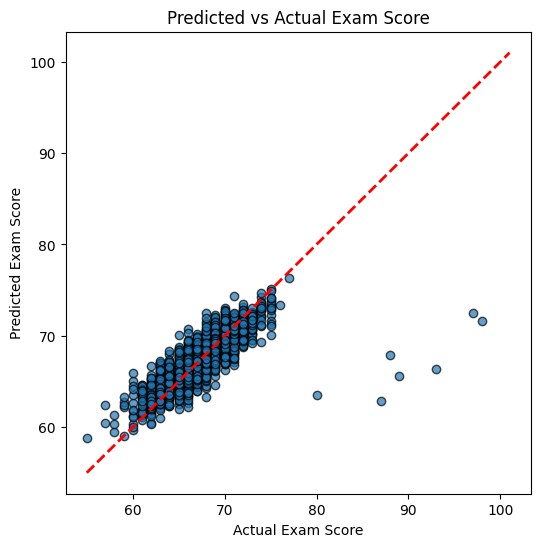

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='black')
plt.plot([y.min(),y.max()],[y.min(),y.max()],'--r',lw=2)
plt.ylabel('Predicted Exam Score')
plt.xlabel('Actual Exam Score')
plt.title('Predicted vs Actual Exam Score')
plt.show()

In [ ]:
features = ["Hours_Studied", "Attendance", "Motivation_Level"]
target = "Exam_Score"

In [ ]:
x=df[features]
y=df[target]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
numeric_features=["Hours_Studied","Attendance"]
categorical_features=["Motivation_Level"]

In [ ]:
preprocessor= ColumnTransformer(
    transformers=[
        ('num','passthrough',numeric_features),
        ('cat',OneHotEncoder(),categorical_features)
    ]
)

In [ ]:
def train_and_evaluate(pipe, title):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

In [ ]:
def train_and_evaluate(pipe, title):
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{title}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Final Score")
    plt.ylabel("Predicted Final Score")
    plt.title(title)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
    plt.show()


Linear Regression (Baseline)
MAE: 1.43
MSE: 5.66
RMSE: 2.38
R²: 0.60


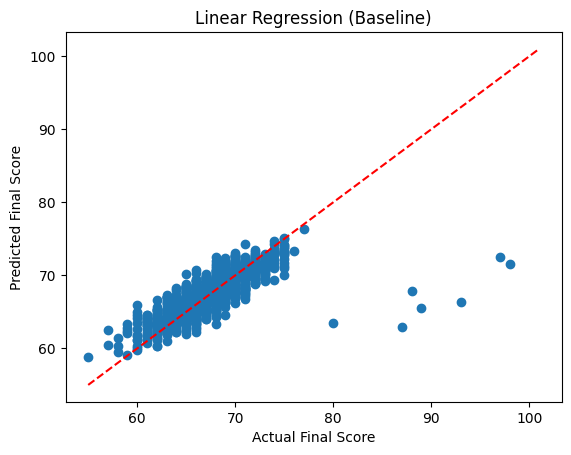

In [ ]:
linear_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])
train_and_evaluate(linear_pipe, "Linear Regression (Baseline)")


Polynomial Regression (Degree 2)
MAE: 1.43
MSE: 5.66
RMSE: 2.38
R²: 0.60


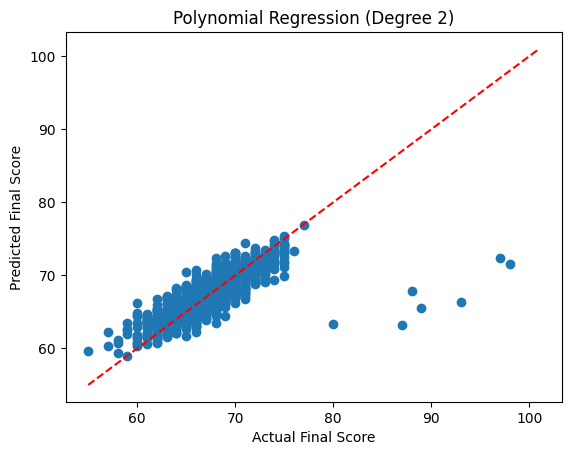

In [ ]:
poly2_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("regressor", LinearRegression())
])
train_and_evaluate(poly2_pipe, "Polynomial Regression (Degree 2)")


Polynomial Regression (Degree 3)
MAE: 1.44
MSE: 5.67
RMSE: 2.38
R²: 0.60


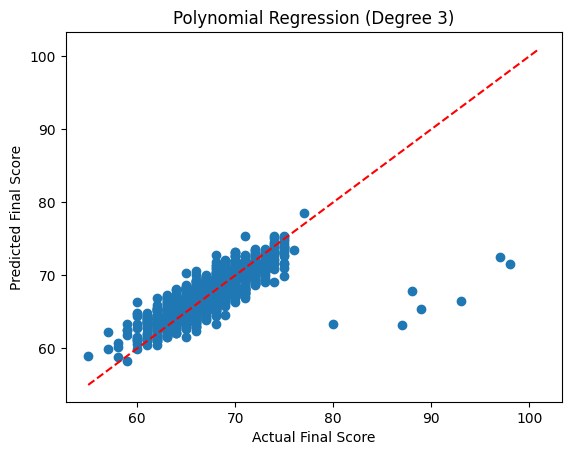

In [ ]:
poly3_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("regressor", LinearRegression())
])
train_and_evaluate(poly3_pipe, "Polynomial Regression (Degree 3)")

In [ ]:
features = [
    "Hours_Studied", "Attendance", "Parental_Involvement", "Access_to_Resources",
    "Extracurricular_Activities", "Sleep_Hours", "Previous_Scores", "Motivation_Level",
    "Internet_Access", "Tutoring_Sessions", "Family_Income", "Teacher_Quality",
    "School_Type", "Peer_Influence", "Physical_Activity", "Learning_Disabilities",
    "Parental_Education_Level", "Distance_from_Home", "Gender"
]

target = "Exam_Score"

x = df[features]
y = df[target]

In [ ]:
categorical_features = [
    "Parental_Involvement", "Extracurricular_Activities", "Motivation_Level",
    "Internet_Access", "School_Type", "Peer_Influence",
    "Learning_Disabilities", "Parental_Education_Level", "Gender",
    "Access_to_Resources", "Family_Income", "Teacher_Quality", "Distance_from_Home"
]

numerical_features = [col for col in features if col not in categorical_features]

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", 'passthrough', numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ])

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
linear_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)

print("Linear Regression:")
print(f"MSE: {mean_squared_error(y_test, y_pred_linear)}")
print(f"R²: {r2_score(y_test, y_pred_linear)}")

Linear Regression:
MSE: 3.252081227589895
R²: 0.7699282240123635


In [ ]:

poly_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("regressor", LinearRegression())
])

poly_model.fit(x_train, y_train)
y_pred_poly = poly_model.predict(x_test)

print("Polynomial Regression (degree 2):")
print(f"MSE: {mean_squared_error(y_test, y_pred_poly)}")
print(f"R²: {r2_score(y_test, y_pred_poly)}")

Polynomial Regression (degree 2):
MSE: 3.610921047522329
R²: 0.7445417379779655


In [ ]:
df['Study_Efficiency'] = df['Hours_Studied'] / (df['Sleep_Hours'] + 1e-5)


In [ ]:
df[["Study_Efficiency"]].head()

,Study_Efficiency
0,3.285710
1,2.374997
2,3.428567
3,3.624995
4,3.166661


In [ ]:
features = ["Study_Efficiency", "Attendance","Motivation_Level", "Teacher_Quality"]
target = "Exam_Score"
X = df[features]
y = df[target]

In [ ]:
numeric_features=x.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features=x.select_dtypes(include=['object']).columns.tolist()

In [ ]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numeric_features),
        ('cat',OneHotEncoder(),categorical_features)
    ]
)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
linear_model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',LinearRegression())
])
linear_model.fit(x_train,y_train)
y_pred_linear=linear_model.predict(x_test)
print("Linear Regression:")
print(f"MSE: {mean_squared_error(y_test,y_pred_linear)}")
print(f"R²: {r2_score(y_test,y_pred_linear)}")

Linear Regression:
MSE: 3.252081227589895
R²: 0.7699282240123635
